# STAT207 Mini-Project #2 - Sabarish Mogalapalli

## Imports

In [520]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## 1. Introduction

Research goal 1 : Build a predictive model that will effectively predict Price for new datasets given the other variables (product name, brand, category, rating, color, size). 

Research goal 2: Build a predictive model that yields reliable interpretative insights about the nature of the relationship between the variables in the dataset.

My motivation to analyze the dataset and find the answer to this question is to gauge how much brand name and other factors like rating affect price in today's world where most of fashion industry and society is starting to move towards away from brand loyalty.

One type of audience that might find the answer to this question helpful are people who are sticking to brand loyalty. This audience can use the findings from this dataset to analyze how much more money they are spending by sticking to brand loyalty and how much they could save if they strayed away from it. This will help them see predict prices of potential products they would like to purchase based on their choice of clothing, brand, size, and rating.

In [353]:
product_df = pd.read_csv("fashion_products.csv")
product_df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


## 2. Dataset Discussion

I got the fashion_products.csv dataset from kaggle. Here is the link to the dataset: https://www.kaggle.com/datasets/bhanupratapbiswas/fashion-products. I downloaded this file at 11:51 PM on Thursday October 26, 2023.

In [354]:
product_df = pd.read_csv("fashion_products.csv")
product_df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [355]:
print(f'Rows: ',product_df.shape[0])

Rows:  1000


## 3. Dataset Cleaning

In [356]:
product_df_copy = product_df.copy()
product_df_copy

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


Filtered out the columns that aren't necessary for our analysis.

In [357]:
product_df_copy = product_df_copy[['Product Name','Brand','Category','Rating','Color','Size','Price']]
product_df_copy

,Product Name,Brand,Category,Rating,Color,Size,Price
0,Dress,Adidas,Men's Fashion,1.043159,Black,XL,40
1,Shoes,H&M,Women's Fashion,4.026416,Black,L,82
2,Dress,Adidas,Women's Fashion,3.337938,Yellow,XL,44
3,Shoes,Zara,Men's Fashion,1.049523,White,S,23
4,T-shirt,Adidas,Men's Fashion,4.302773,Black,M,79
...,...,...,...,...,...,...,...
995,Shoes,Zara,Women's Fashion,1.620081,Black,M,55
996,Sweater,Nike,Kids' Fashion,1.544464,Green,L,13
997,Sweater,Zara,Men's Fashion,3.961913,White,L,47
998,T-shirt,Zara,Women's Fashion,3.089722,Blue,S,68


In [358]:
product_df_copy = product_df_copy.rename(columns={"Product Name": "ProductName"})

In [359]:
product_df_copy['ProductName'].unique()

array(['Dress', 'Shoes', 'T-shirt', 'Jeans', 'Sweater'], dtype=object)

In [360]:
product_df_copy['Brand'].unique()

array(['Adidas', 'H&M', 'Zara', 'Gucci', 'Nike'], dtype=object)

In [361]:
product_df_copy['Category'].unique()

array(["Men's Fashion", "Women's Fashion", "Kids' Fashion"], dtype=object)

In [362]:
product_df_copy['Rating'].unique()

array([1.04315921, 4.02641627, 3.33793756, 1.04952296, 4.30277341,
       1.37956574, 1.35675037, 4.36030329, 4.46618188, 4.0932344 ,
       1.16098796, 2.69973554, 1.60119358, 2.9210042 , 3.67041224,
       1.42271614, 1.48063213, 4.49824468, 3.27834056, 3.78524525,
       2.60958735, 4.56863234, 4.0727248 , 2.49975627, 1.02049267,
       4.74816901, 3.30174341, 2.82280286, 4.94098522, 3.11011357,
       2.75518715, 3.44728947, 4.79940902, 3.92326116, 4.17399157,
       1.01499613, 4.94766478, 2.66306792, 1.78877152, 2.43561134,
       2.92217365, 1.67195889, 3.60186855, 2.03915674, 4.8867111 ,
       2.82786983, 1.28073169, 1.83696397, 3.01224079, 3.08328593,
       3.84299002, 3.96419514, 1.29231997, 2.45052263, 2.82064708,
       2.25132849, 3.61313629, 1.68454137, 3.1584936 , 1.59071307,
       1.04240882, 2.06310873, 4.02627107, 1.77921079, 3.045016  ,
       4.55091731, 4.25168324, 4.30493624, 3.6666674 , 2.53860085,
       4.8649993 , 2.79362581, 2.92398206, 2.88080819, 2.88944

In [363]:
product_df_copy['Color'].unique()

array(['Black', 'Yellow', 'White', 'Blue', 'Green', 'Red'], dtype=object)

In [364]:
product_df_copy['Size'].unique()

array(['XL', 'L', 'S', 'M'], dtype=object)

The Dataset has no implicit or explicit missing values. Due to it having no implicit or explicit missing values, I didn't have to drop any rows. 

The pros of using the missing values cleaning technique is to remove any externalities in the data that could skew the data (0's that are placed since value isn't there) and rows that don't have some values in some fields. The cons could be removing data that are meant to be, (0s that are meant to be there) believing they are implicit missing values which then removes crucial datapoints.

In [365]:
product_df_copy['ProductName'].value_counts()

Jeans      231
Shoes      222
T-shirt    201
Dress      176
Sweater    170
Name: ProductName, dtype: int64

In [366]:
product_df_copy['Brand'].value_counts()

Nike      214
Zara      203
Adidas    198
H&M       194
Gucci     191
Name: Brand, dtype: int64

## 4. Preliminary Analysis

In [367]:
full_model = smf.ols(formula='Price~ProductName+Brand+Category+Rating+Color+Size',data=product_df_copy).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.288
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.182
Time:                        02:09:24   Log-Likelihood:                -4675.4
No. Observations:                1000   AIC:                             9391.
Df Residuals:                     980   BIC:                             9489.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      48.6283      4.319     11.258      0.000      40.152      57.104
ProductName[T.Jeans]            3.3265      2.645      1.258      0.209      -1.864       8.517
ProductName[T.Shoes]            3.6129      2.668      1.354      0.176      -1.623       8.848
ProductName[T.Sweater]          1.8351      2.847      0.645      0.519      -3.752       7.423
ProductName[T.T-shirt]          3.5313      2.734      1.291      0.197      -1.835       8.897
Brand[T.Gucci]                  1.1634      2.675      0.435      0.664      -4.087       6.413
Brand[T.H&M]                    4.3506      2.662      1.635      0.102      -0.872       9.574
Brand[T.Nike]                   4.0857      2.597      1.573      0.116      -1.010       9.181
Brand[T.Zara]                   1.0683      2.626      0.407      0.684      -4.085       6.222
Category[T.Men's Fashion]      -2.7812      2.033     -1.368      0.172      -6.771       1.209
Category[T.Women's Fashion]     0.8272      2.034      0.407      0.684      -3.165       4.820
Color[T.Blue]                  -2.6190      2.923     -0.896      0.371      -8.356       3.117
Color[T.Green]                 -0.6128      2.993     -0.205      0.838      -6.487       5.261
Color[T.Red]                   -0.5326      3.022     -0.176      0.860      -6.463       5.397
Color[T.White]                 -0.9420      2.849     -0.331      0.741      -6.533       4.649
Color[T.Yellow]                -2.4002      2.915     -0.823      0.411      -8.122       3.321
Size[T.M]                       5.0886      2.368      2.149      0.032       0.441       9.736
Size[T.S]                      -2.4199      2.355     -1.027      0.304      -7.042       2.202
Size[T.XL]                      3.5722      2.343      1.525      0.128      -1.026       8.170
Rating                          0.9032      0.725      1.245      0.213      -0.520       2.327
==============================================================================
Omnibus:                      573.521   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.693
Skew:                          -0.076   Prob(JB):                     2.97e-13
Kurtosis:                       1.833   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A fitted values vs. residuals plot for the linear regression model that predicts your response variable given ALL explanatory variables that you intend to explore (ProductName+Brand+Category+Rating+Color+Size).

<function matplotlib.pyplot.show(close=None, block=None)>

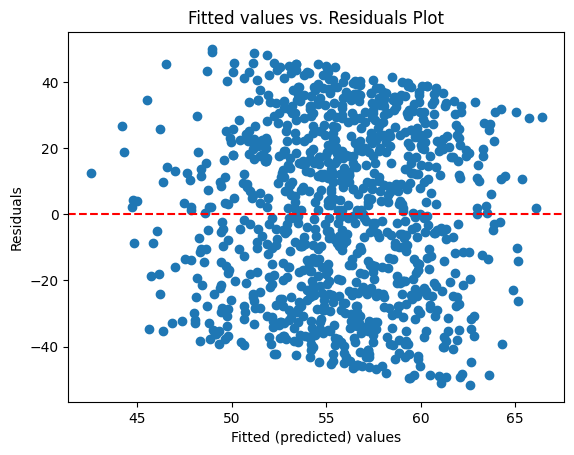

In [368]:
plt.scatter(full_model.fittedvalues, full_model.resid)
plt.axhline(y=0, color="r", linestyle = '--')
plt.xlabel("Fitted (predicted) values")
plt.ylabel("Residuals")
plt.title("Fitted values vs. Residuals Plot")
plt.show

If we were to transform the variables, I believe would have the same fit. There already is a similar amount on the bottom and top of the plot which means that it meets the linearity assumption and is a good fit. 

For every (numerical explanatory variable x1, categorical explanatory variable x2) pair, create a scatterplot with x=x1, y=price, and color code by x2. Create a best fit line for every distinct value of x2.

Numerical: Rating
Categorical: Product Name, Brand, Category, Color, Size

x1              x2

Rating Product Name

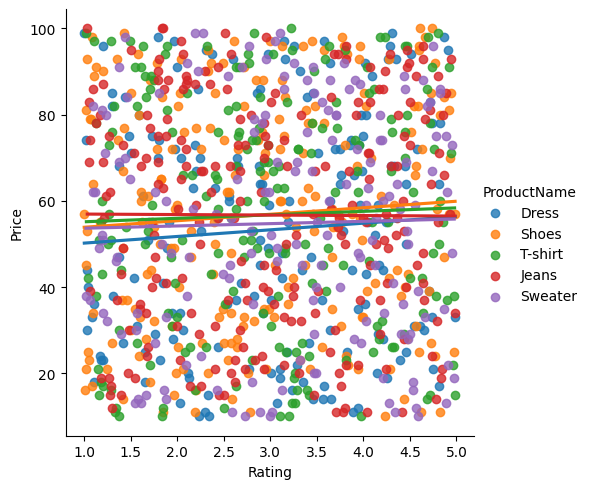

In [369]:
sns.lmplot(x='Rating',y='Price',ci=False, data=product_df_copy, hue="ProductName")

Rating Size

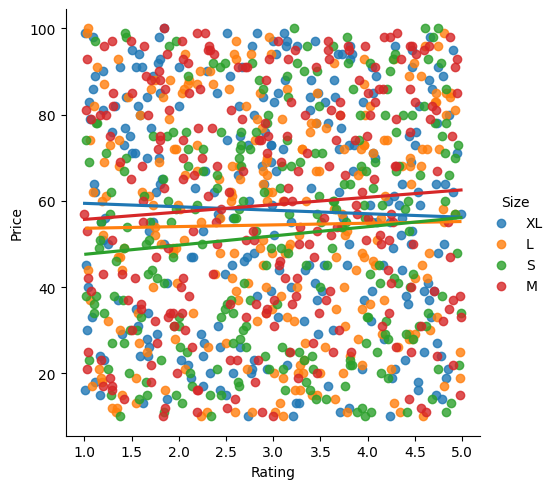

In [370]:
sns.lmplot(x='Rating',y='Price',ci=False, data=product_df_copy, hue="Size")

Rating Color

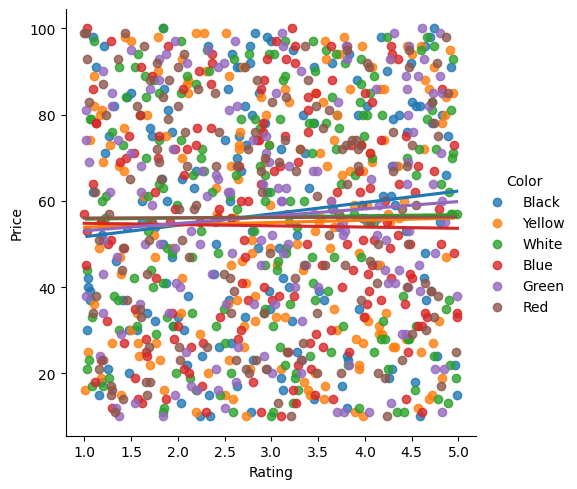

In [371]:
sns.lmplot(x='Rating',y='Price',ci=False, data=product_df_copy, hue="Color")

Rating Category

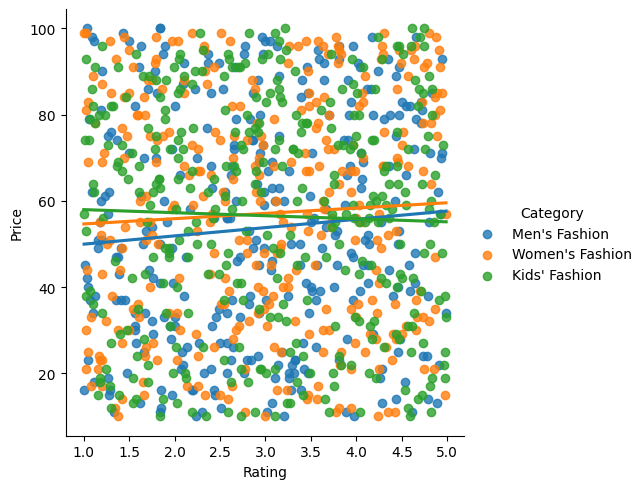

In [372]:
sns.lmplot(x='Rating',y='Price',ci=False, data=product_df_copy, hue="Category")

Rating Brand

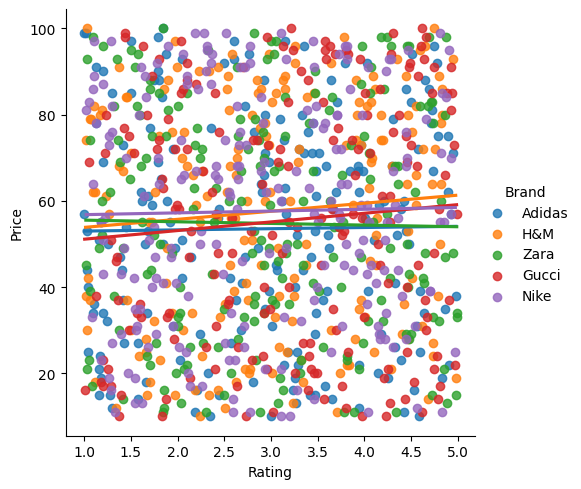

In [373]:
sns.lmplot(x='Rating',y='Price',ci=False, data=product_df_copy, hue="Brand")

Color and Rating have the weakest interaction which can be seen as the lines have the most overlap of all the plots. There doesn't seem to be a strong interaction among any of the variables.

In [524]:
reduced_model = smf.ols(formula='Price~ProductName+Size+Color+Category+Brand',data=product_df_copy).fit()
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.273
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.197
Time:                        15:41:24   Log-Likelihood:                -4676.2
No. Observations:                1000   AIC:                             9390.
Df Residuals:                     981   BIC:                             9484.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      51.2890      3.755     13.660      0.000      43.921      58.657
ProductName[T.Jeans]            3.2766      2.645      1.239      0.216      -1.915       8.468
ProductName[T.Shoes]            3.5026      2.667      1.313      0.189      -1.731       8.737
ProductName[T.Sweater]          1.9526      2.847      0.686      0.493      -3.633       7.539
ProductName[T.T-shirt]          3.4742      2.735      1.270      0.204      -1.892       8.841
Size[T.M]                       5.0384      2.369      2.127      0.034       0.390       9.686
Size[T.S]                      -2.3864      2.356     -1.013      0.311      -7.009       2.236
Size[T.XL]                      3.5689      2.344      1.523      0.128      -1.030       8.168
Color[T.Blue]                  -2.5667      2.924     -0.878      0.380      -8.304       3.171
Color[T.Green]                 -0.4801      2.992     -0.160      0.873      -6.352       5.392
Color[T.Red]                   -0.5414      3.023     -0.179      0.858      -6.473       5.390
Color[T.White]                 -0.8227      2.848     -0.289      0.773      -6.412       4.767
Color[T.Yellow]                -2.2764      2.915     -0.781      0.435      -7.996       3.443
Category[T.Men's Fashion]      -2.8676      2.033     -1.411      0.159      -6.856       1.121
Category[T.Women's Fashion]     0.7918      2.035      0.389      0.697      -3.201       4.785
Brand[T.Gucci]                  1.3619      2.671      0.510      0.610      -3.880       6.604
Brand[T.H&M]                    4.3820      2.662      1.646      0.100      -0.842       9.606
Brand[T.Nike]                   4.0222      2.597      1.549      0.122      -1.074       9.118
Brand[T.Zara]                   1.1219      2.627      0.427      0.669      -4.032       6.276
==============================================================================
Omnibus:                      581.810   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.913
Skew:                          -0.077   Prob(JB):                     2.66e-13
Kurtosis:                       1.831   Cond. No.                         9.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. Predictive Models

Need to change categorical variables to have numerical values in order to use regularization.

In [374]:
product_df_copy_with_ind = pd.get_dummies(product_df_copy, drop_first=True)
product_df_copy_with_ind

,Rating,Price,ProductName_Jeans,ProductName_Shoes,ProductName_Sweater,ProductName_T-shirt,Brand_Gucci,Brand_H&M,Brand_Nike,Brand_Zara,Category_Men's Fashion,Category_Women's Fashion,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_M,Size_S,Size_XL
0,1.043159,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,4.026416,82,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,3.337938,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,1.049523,23,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
4,4.302773,79,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.620081,55,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
996,1.544464,13,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
997,3.961913,47,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
998,3.089722,68,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0


In [375]:
product_df_copy_with_ind = product_df_copy_with_ind.rename(columns={"Brand_H&M":"Brand_HM","ProductName_T-shirt":"ProductNameTshirt", "Category_Men's Fashion": "Category_Mens_Fashion","Category_Women's Fashion":"Category_Womens_Fashion"})
product_df_copy_with_ind

,Rating,Price,ProductName_Jeans,ProductName_Shoes,ProductName_Sweater,ProductNameTshirt,Brand_Gucci,Brand_HM,Brand_Nike,Brand_Zara,Category_Mens_Fashion,Category_Womens_Fashion,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_M,Size_S,Size_XL
0,1.043159,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,4.026416,82,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,3.337938,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,1.049523,23,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
4,4.302773,79,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.620081,55,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
996,1.544464,13,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
997,3.961913,47,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
998,3.089722,68,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0


Create a train and test dataset model to help select our best predictive model.

In [376]:
product_df_copy_with_ind

,Rating,Price,ProductName_Jeans,ProductName_Shoes,ProductName_Sweater,ProductNameTshirt,Brand_Gucci,Brand_HM,Brand_Nike,Brand_Zara,Category_Mens_Fashion,Category_Womens_Fashion,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_M,Size_S,Size_XL
0,1.043159,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,4.026416,82,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,3.337938,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,1.049523,23,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
4,4.302773,79,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.620081,55,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
996,1.544464,13,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
997,3.961913,47,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
998,3.089722,68,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0


In [517]:
#might need to change these values
df_train,df_test = train_test_split(product_df_copy_with_ind,test_size=0.2,random_state=123)

In [377]:
training_explanatory = df_train.drop(['Price'],axis=1)
training_explanatory.head()

,Rating,ProductNameJeans,ProductNameShoes,ProductNameSweater,ProductName_Tshirt,BrandGucci,BrandHandM,BrandNike,BrandZara,CategoryMensFashion,CategoryWomensFashion,ColorBlue,ColorGreen,ColorRed,ColorWhite,ColorYellow,SizeM,SizeS,SizeXL
464,1.202303,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0
554,3.936087,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
718,1.939962,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0
412,4.849343,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
73,2.880808,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [378]:
training_response = df_train['Price']
training_response.head()

464    17
554    67
718    34
412    21
73     68
Name: Price, dtype: int64

In [379]:
test_explanatory = df_test.drop(['Price'],axis=1)
test_explanatory.head()

,Rating,ProductNameJeans,ProductNameShoes,ProductNameSweater,ProductName_Tshirt,BrandGucci,BrandHandM,BrandNike,BrandZara,CategoryMensFashion,CategoryWomensFashion,ColorBlue,ColorGreen,ColorRed,ColorWhite,ColorYellow,SizeM,SizeS,SizeXL
272,1.764609,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
549,2.928258,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
426,4.717963,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
899,1.608145,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1
362,3.142885,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [380]:
test_response = df_test['Price']
test_response.head()

272    29
549    69
426    15
899    91
362    33
Name: Price, dtype: int64

# Scaling

Scale the dataset to see the magnitude of our slopes as representing how important each explanatory variable (product name, brand, category, color, size) is when predicting the response variable.

In [381]:
from sklearn.preprocessing import StandardScaler
scaler_training = StandardScaler()
scaled_explvars = scaler_training.fit_transform(training_explanatory)
training_explanatory = pd.DataFrame(scaled_explvars,columns = training_explanatory.columns)
training_explanatory.head()

,Rating,ProductNameJeans,ProductNameShoes,ProductNameSweater,ProductName_Tshirt,BrandGucci,BrandHandM,BrandNike,BrandZara,CategoryMensFashion,CategoryWomensFashion,ColorBlue,ColorGreen,ColorRed,ColorWhite,ColorYellow,SizeM,SizeS,SizeXL
0,-1.549669,-0.468521,-0.57735,-0.5,2.134375,2.291288,-0.460566,-0.615882,-0.484322,-0.639101,1.36277,-0.452570,-0.395056,-0.411814,2.064742,-0.523341,1.829707,-0.538816,-0.631349
1,0.883797,-0.468521,-0.57735,-0.5,2.134375,-0.436436,-0.460566,-0.615882,-0.484322,-0.639101,1.36277,2.209605,-0.395056,-0.411814,-0.484322,-0.523341,-0.546536,-0.538816,-0.631349
2,-0.893045,-0.468521,-0.57735,-0.5,-0.468521,-0.436436,2.171241,-0.615882,-0.484322,-0.639101,1.36277,2.209605,-0.395056,-0.411814,-0.484322,-0.523341,1.829707,-0.538816,-0.631349
3,1.696727,2.134375,-0.57735,-0.5,-0.468521,-0.436436,-0.460566,-0.615882,2.064742,-0.639101,1.36277,-0.452570,2.531286,-0.411814,-0.484322,-0.523341,-0.546536,-0.538816,1.583910
4,-0.055555,-0.468521,-0.57735,-0.5,-0.468521,-0.436436,-0.460566,-0.615882,2.064742,-0.639101,1.36277,-0.452570,-0.395056,-0.411814,2.064742,-0.523341,-0.546536,-0.538816,1.583910


In [382]:
scaled_explvars = scaler_training.fit_transform(test_explanatory)
test_explanatory = pd.DataFrame(scaled_explvars,columns = test_explanatory.columns)
test_explanatory.head()

,Rating,ProductNameJeans,ProductNameShoes,ProductNameSweater,ProductName_Tshirt,BrandGucci,BrandHandM,BrandNike,BrandZara,CategoryMensFashion,CategoryWomensFashion,ColorBlue,ColorGreen,ColorRed,ColorWhite,ColorYellow,SizeM,SizeS,SizeXL
0,-1.070332,-0.567727,-0.523341,-0.440488,-0.509748,-0.498046,-0.498046,2.007846,-0.509748,1.424887,-0.687965,-0.456573,-0.438464,-0.422141,2.039924,-0.444528,-0.57735,-0.585049,1.749547
1,-0.066718,-0.567727,-0.523341,-0.440488,1.961756,-0.498046,-0.498046,2.007846,-0.509748,1.424887,-0.687965,-0.456573,-0.438464,-0.422141,-0.490214,2.249579,-0.57735,-0.585049,-0.571577
2,1.476854,-0.567727,-0.523341,-0.440488,1.961756,-0.498046,-0.498046,-0.498046,1.961756,-0.701810,-0.687965,-0.456573,-0.438464,-0.422141,-0.490214,2.249579,-0.57735,-0.585049,1.749547
3,-1.205279,-0.567727,-0.523341,-0.440488,1.961756,-0.498046,-0.498046,2.007846,-0.509748,1.424887,-0.687965,2.190229,-0.438464,-0.422141,-0.490214,-0.444528,-0.57735,-0.585049,1.749547
4,0.118392,1.761410,-0.523341,-0.440488,-0.509748,-0.498046,-0.498046,2.007846,-0.509748,-0.701810,-0.687965,-0.456573,-0.438464,-0.422141,-0.490214,2.249579,-0.57735,-0.585049,-0.571577


# Linear Regression Full Model

In [383]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(training_explanatory,training_response)

LinearRegression()

In [384]:
test_r2 = linear_regression_model.score(test_explanatory,test_response)
print(f"The r^2 is",test_r2)


The r^2 is -0.11352471442540812


# Feature Selection: Backwards Elimination Algorithm

In [385]:
#Full model with all variables
full_model = smf.ols(formula='Price~ProductName+Brand+Category+Rating+Color+Size',data=product_df_copy).fit()
full_model.rsquared_adj

0.005444428272238011

Test model 1

In [386]:
#Test model 1-1 - No ProductName
test_model1 = smf.ols(formula='Price~Brand+Category+Rating+Color+Size',data=product_df_copy).fit()
test_model1.rsquared_adj

0.006878020494640591

In [387]:
#Test model 1-2 - No Brand
test_model1 = smf.ols(formula='Price~ProductName+Category+Rating+Color+Size',data=product_df_copy).fit()
test_model1.rsquared_adj

0.005023659974187633

In [388]:
#Test model 1-3 - No Category
test_model1 = smf.ols(formula='Price~ProductName+Brand+Rating+Color+Size',data=product_df_copy).fit()
test_model1.rsquared_adj

0.004101186933797685

In [389]:
#Test model 1-4 - No Rating
test_model1 = smf.ols(formula='Price~ProductName+Brand+Category+Color+Size',data=product_df_copy).fit()
test_model1.rsquared_adj

0.00488672643342114

In [390]:
#Test model 1-5 - No Color - NEW CURRENT MODEL 1
test_model1 = smf.ols(formula='Price~ProductName+Brand+Category+Rating+Size',data=product_df_copy).fit()
test_model1.rsquared_adj

0.009117950458309432

In [391]:
#Test model 1-6 - No Size
test_model1 = smf.ols(formula='Price~ProductName+Brand+Category+Rating+Color',data=product_df_copy).fit()
test_model1.rsquared_adj

-0.004071311795488919

In [392]:
## NEW CURRENT MODEL 1 (NO COLOR)
current_model1 = smf.ols(formula='Price~ProductName+Brand+Category+Rating+Size',data=product_df_copy).fit()
current_model1.rsquared_adj

0.009117950458309432

In [393]:
#Test model 2-1 - No Product Name -- NEW CURRENT MODEL
test_model2 = smf.ols(formula='Price~Brand+Category+Rating+Size', data=product_df_copy).fit()
test_model2.rsquared_adj

0.010153466279410162

In [394]:
#Test model 2-2 - No Brand
test_model2 = smf.ols(formula='Price~ProductName+Category+Rating+Size',data=product_df_copy).fit()
test_model2.rsquared_adj

0.008594680512077568

In [395]:
#Test model 2-3 - No Category
test_model2 = smf.ols(formula='Price~ProductName+Brand+Rating+Size',data=product_df_copy).fit()
test_model2.rsquared_adj

0.007898041491287922

In [396]:
#Test model 2-4 - No Rating
test_model2 = smf.ols(formula='Price~ProductName+Brand+Category+Size',data=product_df_copy).fit()
test_model2.rsquared_adj

0.008610523453226215

In [397]:
#Test model 2-5 - No Size
test_model2 = smf.ols(formula='Price~ProductName+Brand+Category+Rating',data=product_df_copy).fit()
test_model2.rsquared_adj

5.796072296948562e-05

In [398]:
## NEW CURRENT MODEL 2 (NO COLOR OR PRODUCT NAME)
current_model2 = smf.ols(formula='Price~Brand+Category+Rating+Size', data=product_df_copy).fit()
current_model2.rsquared_adj

0.010153466279410162

In [399]:
#Test model 3-1 - No Brand
test_model3 = smf.ols(formula='Price~Category+Rating+Size', data=product_df_copy).fit()
test_model3.rsquared_adj

0.009825160226195728

In [400]:
#Test model 3-1 - No Category
test_model3 = smf.ols(formula='Price~Brand+Rating+Size', data=product_df_copy).fit()
test_model3.rsquared_adj

0.009114335201425794

In [401]:
#Test model 3-1 - No Rating
test_model3 = smf.ols(formula='Price~Brand+Category+Size', data=product_df_copy).fit()
test_model3.rsquared_adj

0.009820825031754743

In [402]:
#Test model 3-1 - No Size
test_model3 = smf.ols(formula='Price~Brand+Category+Rating', data=product_df_copy).fit()
test_model3.rsquared_adj

0.0009057457876416874

In [403]:
product_df_copy_with_ind

,Rating,Price,ProductName_Jeans,ProductName_Shoes,ProductName_Sweater,ProductNameTshirt,Brand_Gucci,Brand_HM,Brand_Nike,Brand_Zara,Category_Mens_Fashion,Category_Womens_Fashion,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_M,Size_S,Size_XL
0,1.043159,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,4.026416,82,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,3.337938,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,1.049523,23,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
4,4.302773,79,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.620081,55,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
996,1.544464,13,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
997,3.961913,47,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
998,3.089722,68,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0


In [521]:
final_model_test_predict = current_model2.predict(df_test)
r2_score(df_test["Price"],final_model_test_predict)

0.0010123895845216557

## 6. Best Model Discussion

The full model from the preliminary analysis will have the best prediction performance for new datasets since it has the highest r^2 value (0.024) compared to the reduced model and final model from the backwards elimination algorithm. Since it has the highest r^2 value, it has the most predictive power of all the models.

## 7. Conclusion

I would recommend that the full model be used by the intended audience of people who are sticking to brand loyalty. The full model has the best fit and takes into account many variables and categories that would influence price and purchase decision. I felt that there could be a greater variety in brands that were used in the dataset. In order to conduct a more comprehensive analysis, we would also do all three feature selection algorithms to determine the best model. My biggest shortcoming was conducting the backwards elimination algorithm, for a long time I was trying to deem whether I should utilize all the categorical variable columns as part of it too. In the end I found that this was not necessary. This took up time and almost made me not submit by the deadline.

For future work I would use Rating as the response variable and conduct my analysis that way and see how much answers differ to a new response variable.